<a href="https://colab.research.google.com/github/silviolima07/residencia_tec_puc_ml/blob/main/Aula_16_Assincrona_Avaliacao_Ef_Estr_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Grupo:
- Silvio Cesar de Lima - RA 23029232
- Vitor Pereira Andrade - RA 23029249
- Marcos Paulo Cassiano Pena - RA 23029256

### References:
- https://medium.com/analytics-vidhya/finding-out-optimum-neighbours-n-number-in-the-knn-classification-using-python-9bdcfefff58c

## Avaliação da Eficiência de Estratégia de Modelo de Machine de Learning

### Práticas a serem desenvolvidas:
#### 1. Análise de estratégia mediante modificação de parãmetros do modelo visando verficação de desemprenho.


### Roteiro Inicial
### Importe o banco de dados Wine Quality através da biblioteca sklearn . Separe
### os dados em conjuntos de features para uma variável X e a variável target
###  para a variável y.
### No passo seguinte, divida os dados em conjuntos de
### treinamento e teste, considerando a proporção - e random_state = 0 .

### Exercício 1)
### Verifique o desempenho do algoritmo k-Nearest Neighbor na tarefa de classificação das classes envolvidas no dataset para três diferentes valores do parâmetro k : 2, 5 e 10.
### Verifique o valor da acurácia para cada um dos valores do parâmetro k e plote um gráfico mostrando a variação da acurácia pelo número de vizinho.

### Exercício 2)
### Verifique o desempenho do algoritmo Random Forest na tarefa de classificação das classes envolvidas no dataset para três valores diferentes do número de arvores existentes na floresta. O parâmetro n_estimators deve assumir os valores 10, 50 e 100.
### Calcule a acurácia para cada um dos valores e plote um gráfico mostrando a
### variação do desempenho do modelo de acordo com a variação do parâmetro. Ou
### seja, o gráfico deve indicar a variação da acurácia pelo número de árvores
### na floresta.

### Exercício 3)
### Explique as diferenças encontradas nos resultados dos exercícios 1) e 2

### Import libs necessárias

In [1]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics  import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_wine


### 1) Leitura de dataset

In [2]:
# Program to load Wine Dataset
# Load useful libraries
import pandas as pd
from sklearn.datasets import load_wine
# Loading dataset
data = load_wine()
# Configuring pandas to show all features
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Converting data to a dataframe to view properly
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
# Printing first 5 observations
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [3]:
df['target'] = data.target

In [4]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [5]:
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


### Checar se há dados ausentes

In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

### Tipo dos dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
print("df\nColunas:",df.shape[0],"\nLinhas:", df.shape[1],'\nColunas:', df.columns.to_list())

df
Colunas: 178 
Linhas: 14 
Colunas: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target']


### 2) Separe os dados de entrada e saída considerando que a coluna de índice corresponde ao label (target) dos dados de cada linha.

In [9]:
# Remover a coluna target em X
X = df.drop(['target'], axis=1)
#
# Separar a coluna target em y
y = df['target']

In [10]:
X.shape

(178, 13)

In [11]:
y.shape

(178,)

### 3) Separe os dados em dados de treinamento e teste utilizando a proporção 80% e 20%, respectivamente, e random state = 0.

### Divisão em treino e teste

In [12]:
size = 0.2
random_state = 0

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=size,random_state=random_state)

In [14]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape, "\n")
#
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (142, 13)
X_test: (36, 13) 

y_train: (142,)
y_test: (36,)


## EXERCICIO 1  Acuracia - k-Nearest Neighbor com K = 2,5,10

### 4) Verifique a acurácia do modelo para os valores do parâmetro k igual a 2, 5 e 10. Plote um gráfico mostrando a variação da acurácia pelo número de vizinhos.

### Acurácia é a taxa obtida pela divisão da soma dos labels verdadeiros positivos mais os labels de verdadeiros negativos pela soma de todos os labels presentes, sem verdadeiros ou falsos positivos e negativos.
- Equaçao: (VP+VN) / (VP+VN+FN+FP)

In [15]:
lista_k = [2,5,10]
l_acuracia = []

for n in range(len(lista_k)):
  print("Numero de vizinhos:", lista_k[n])
  # Knn Classifier
  clf = KNeighborsClassifier(n_neighbors=lista_k[n])

  #Train the model using the training sets
  clf.fit(X_train, y_train)

  y_predicted = clf.predict(X_test)
  acuracia = round(accuracy_score(y_test, y_predicted),2)
  print("Acuracia:",acuracia,"\n")
  l_acuracia.append(acuracia)

print("Acuracia obtida:",l_acuracia)


Numero de vizinhos: 2
Acuracia: 0.75 

Numero de vizinhos: 5
Acuracia: 0.81 

Numero de vizinhos: 10
Acuracia: 0.72 

Acuracia obtida: [0.75, 0.81, 0.72]


In [16]:
l_parametro = ['n_vizinhos']*len(lista_k)
data = {'valor': lista_k,
        'Acuracia': l_acuracia,
        'parametro': l_parametro}
df1 = pd.DataFrame(data)
df1

,valor,Acuracia,parametro
0,2,0.75,n_vizinhos
1,5,0.81,n_vizinhos
2,10,0.72,n_vizinhos


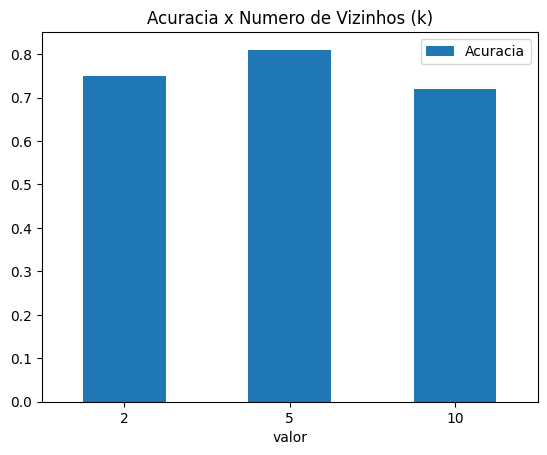

In [17]:
ax1 = df1.plot.bar(x='valor', y='Acuracia', rot=0)

plt.title("Acuracia x Numero de Vizinhos (k)");
plt.savefig("qtd_vizinhos.png")

## EXERCICIO 2 Acuracia - Random Forest com n_estimators = 10,50 e 100

In [18]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape, "\n")
#
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (142, 13)
X_test: (36, 13) 

y_train: (142,)
y_test: (36,)


In [26]:
l_n_estimators = [10,50, 100]
l_acuracia = []

for n in range(len(l_n_estimators)):
  print("Numero de estimators:", l_n_estimators[n])
  # Random Forest Classifier
  clf = RandomForestClassifier(n_estimators=l_n_estimators[n], random_state=random_state)

  #Train the model using the training sets
  clf.fit(X_train, y_train)

  y_predicted = clf.predict(X_test)
  acuracia = round(accuracy_score(y_test, y_predicted),2)
  print("Acuracia:",acuracia,"\n")
  l_acuracia.append(acuracia)

print("Acuracia obtida:",l_acuracia)


Numero de estimators: 10
Acuracia: 0.97 

Numero de estimators: 50
Acuracia: 0.94 

Numero de estimators: 100
Acuracia: 0.97 

Acuracia obtida: [0.97, 0.94, 0.97]


In [27]:
l_parametro = ['n_estimators']*len(l_n_estimators)
data = {'valor': l_n_estimators,
        'Acuracia': l_acuracia,
        'parametro':l_parametro}
df2 = pd.DataFrame(data)
df2

,valor,Acuracia,parametro
0,10,0.97,n_estimators
1,50,0.94,n_estimators
2,100,0.97,n_estimators


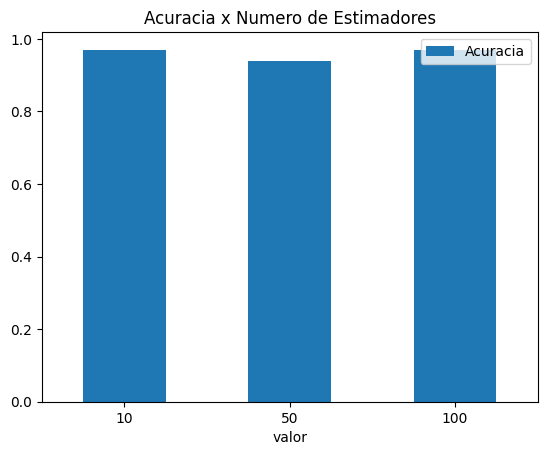

In [21]:
ax = df2.plot.bar(x='valor', y='Acuracia', rot=0)

plt.title("Acuracia x Numero de Estimadores");
plt.savefig("qtd_estimadores.png")

## EXERCICIO 3
### Explique as diferenças encontradas nos resultados dos exercicios 1 e 2.

In [22]:
frames = [df1,df2]

In [23]:
df3 = pd.concat(frames)
df3

,valor,Acuracia,parametro
0,2,0.75,n_vizinhos
1,5,0.81,n_vizinhos
2,10,0.72,n_vizinhos
0,10,0.97,n_estimators
1,50,0.94,n_estimators
2,100,0.97,n_estimators


In [24]:
import seaborn as sns

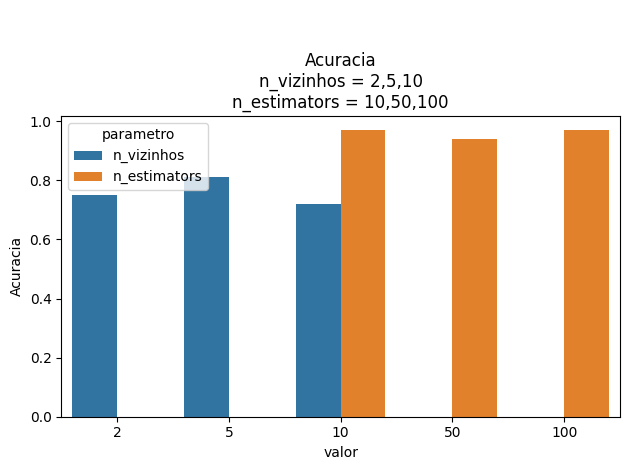

In [33]:
sns.barplot(data=df3, x="valor", y="Acuracia", hue="parametro")
plt.title("\n\nAcuracia\nn_vizinhos = 2,5,10\nn_estimators = 10,50,100");
plt.tight_layout()
plt.savefig("exerc3.png")

## k-Nearest Neighbor
### O knn classifica os dados base na quantidade de elementos semelhantes próximos a um ponto escolhido aleatoriamente, a quantidade de elementos é definida pelo parâmetro k, a medida que aumentamos o valor desse parâmetro, o algoritmo treina usando um nùmero de elementos maior para definir a que classe o elemento no ponto aleatório pertence. Se o valor desse parâmetro for muito pequeno ou muito grande pontos considerados ruído(noyse) podem impactar no aprendizado do algoritmo. Uma solução seria utilizar uma faixa de valores e checar como a taxa de erro ( predicted != y_test) se comporta e usar o valor onde a taxa de erro foi a menor. No exemplo acima, o melhor valor para o parâmetro k foi 5 vizinhos.
## Random Forest
### O rand forest se baseia na arvore de decisão para definir a classe de um elemento desejado.
### São utilizados diversas arvores que recebem os dados e fazem o processo de classificação e no final através de um votação entre os resultados de todas arvores o resultado final é encontrado.
### A quantidade de arvores pode impactar no resultado final.
### Um alto valor de performance, no caso de Classificação, a acurácia, pode indicar overfitting, onde o modelo aprende baseado nos dados de treinamento, porém algo se aplicado em dados novos não obtém uma performance semelhante.
### No exemplo estudado, com valores de n_estimators igual a 10, 50 e 100, o algooritmo apresentou uma acurácia cada vez maior, até atingir o 100% com valor de 100 n_estimators. Em dados reais provavelmente não atingirá essa mesma acurácia.

In [34]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

st_x= StandardScaler()
x_train= st_x.fit_transform(X_train)
x_test= st_x.transform(X_test)

In [43]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.0 at K = 6


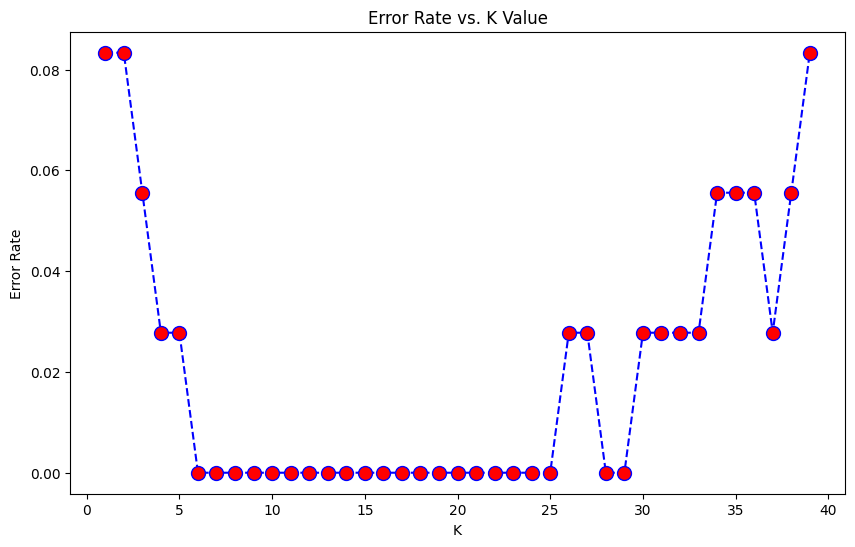

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)